# Capstone 2: Modeling

About the data
This dataset contains information on energy consumption and various weather parameters such as solar radiation, temperature, pressure, humidity, wind speed, and precipitation. The "Energy delta[Wh]" column represents the change in energy consumption over a certain time period, while the "GHI" column measures the Global Horizontal Irradiance, which is the amount of solar radiation received by a horizontal surface. The dataset also includes information on the presence of sunlight ("isSun"), the length of daylight ("dayLength"), and the amount of time during which sunlight is available ("sunlightTime"). The "weather_type" column provides information on the overall weather conditions such as clear, cloudy, or rainy. The dataset is organized by hour and month, making it ideal for studying the relationship between renewable energy generation and weather patterns over time.
This text above is taken from the source of the data: https://www.kaggle.com/code/totoro29/renewable-energy-analysis

I'd like to investigate the relationship between the consumption of energy and how it is affected by the changing weather conditions. This is relevant information to be able to forecast and anticipate the potential renewable energy demand depending on the different weather conditions.

In the previous Capstone 2 project I did the EDA and Pre-processing and Training Data Development and saved the files with the output data from that work. Saved as: 'X_train.csv', 'X_test.csv', 'y_train.csv', 'y_test.csv'

In [1]:
#import pandas, numpy, matlab, seaborn

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')


In [2]:
# Load and preprocess the time series data
df = pd.read_csv('/Users/claudiazaffaroni/Desktop/Springboard_Data_Science_Course/Unit 18 Machine Learning Applications/Capstone 2/Capstone2_EDA.csv')
df['Time'] = pd.to_datetime(df['Time'])
df = df.rename(columns={'Time': 'Date'})
df = df.rename(columns={'Energy_delta[Wh]': 'energy'})
df.set_index('Date', inplace=True)
df.head()

,energy,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
Date,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [3]:
# Convert time data to time signal
day = 60 * 60 * 24
year = 365.2425 * day
df['timestamp'] = df.index.map(pd.Timestamp.timestamp)
df['day sin'] = np.sin(df['timestamp'] * (2 * np.pi/day))
df['day cos'] = np.cos(df['timestamp'] * (2 * np.pi/day))
df['year sin'] = np.sin(df['timestamp'] * (2 * np.pi/year))
df['year cos'] = np.cos(df['timestamp'] * (2 * np.pi/year))
df.head()

,energy,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,...,dayLength,SunlightTime/daylength,weather_type,hour,month,timestamp,day sin,day cos,year sin,year cos
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483229e+09,2.504006e-13,1.000000,0.010364,0.999946
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483230e+09,6.540313e-02,0.997859,0.010544,0.999944
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483231e+09,1.305262e-01,0.991445,0.010723,0.999943
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483232e+09,1.950903e-01,0.980785,0.010902,0.999941
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,...,450,0.0,4,1,1,1.483232e+09,2.588190e-01,0.965926,0.011081,0.999939


In [4]:
df = df.drop(['timestamp', 'hour', 'month'], axis='columns')
df.head()

,energy,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,day sin,day cos,year sin,year cos
Date,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,2.504006e-13,1.000000,0.010364,0.999946
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,6.540313e-02,0.997859,0.010544,0.999944
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,1.305262e-01,0.991445,0.010723,0.999943
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,1.950903e-01,0.980785,0.010902,0.999941
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,2.588190e-01,0.965926,0.011081,0.999939


### Split your data into testing and training datasets

In [5]:
# import necessary packages

from sklearn.model_selection import train_test_split

In [6]:
# create 'y' variable

y = df[['energy']]
y.columns

Index(['energy'], dtype='object')

In [7]:
# drop the column we want to predict

X = df.drop(columns=['energy'])
X.columns

Index(['GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'snow_1h', 'clouds_all', 'isSun', 'sunlightTime', 'dayLength',
       'SunlightTime/daylength', 'weather_type', 'day sin', 'day cos',
       'year sin', 'year cos'],
      dtype='object')

In [8]:
# Divide the complete dataset into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# Divide dataset for linear and ols models 
total_samples = len(X)
split_ratio = 0.8  # You can adjust this ratio as needed

# Calculate the split index
split_index = int(total_samples * split_ratio)

# Split the data into training and testing sets
X_train_time, X_test_time = X[:split_index], X[split_index:]
y_train_time, y_test_time = y[:split_index], y[split_index:]

In [10]:
# Take a look at the first few rows
print(X_test.head())
print(X_train.head())
print(y_test.head())
print(y_train.head())


                      GHI  temp  pressure  humidity  wind_speed  rain_1h  \
Date                                                                       
2020-02-28 07:30:00  35.2  -0.7      1008        94         4.0      0.0   
2022-07-09 22:30:00   0.0  13.8      1018        76         5.5      0.0   
2021-04-25 20:00:00   0.0   1.7      1024        61         3.0      0.0   
2022-06-05 02:15:00   0.0   7.7      1023        97         2.1      0.0   
2019-03-06 13:15:00  68.5   8.9      1009        63         6.0      0.0   

                     snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
Date                                                                       
2020-02-28 07:30:00      0.0          99      1           120        645   
2022-07-09 22:30:00      0.0          52      0             0       1005   
2021-04-25 20:00:00      0.0          22      0             0        885   
2022-06-05 02:15:00      0.0           0      0             0       1005   
2019-03-06 

### Standardize the magnitude of numeric features using a scaler.

In [11]:
from sklearn import preprocessing

# Making a Scaler object
scaler = preprocessing.StandardScaler()

#  Fit the scaler on the training data
scaler.fit(X_train)

# Transform (scale) both the training and test data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.head())
print(X_test.head())

                       GHI  temp  pressure  humidity  wind_speed  rain_1h  \
Date                                                                        
2018-02-19 11:15:00   88.8   2.6      1023        69         3.2      0.0   
2020-04-09 07:15:00  107.2  10.1      1021        70         4.5      0.0   
2019-12-02 11:15:00   26.5   3.8      1016        88         5.7      0.0   
2022-01-22 13:15:00   17.4   1.5      1028        72         3.0      0.0   
2019-09-26 18:00:00    0.0  12.8      1013        91         2.0      0.0   

                     snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
Date                                                                       
2018-02-19 11:15:00      0.0         100      1           315        600   
2020-04-09 07:15:00      0.0           0      1           195        810   
2019-12-02 11:15:00      0.0          57      1           270        465   
2022-01-22 13:15:00      0.0          64      1           390        495   
2019

In [12]:
# Take a look at the shapes
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)


(39356, 17)
(157420, 17)
(39356, 1)
(157420, 1)


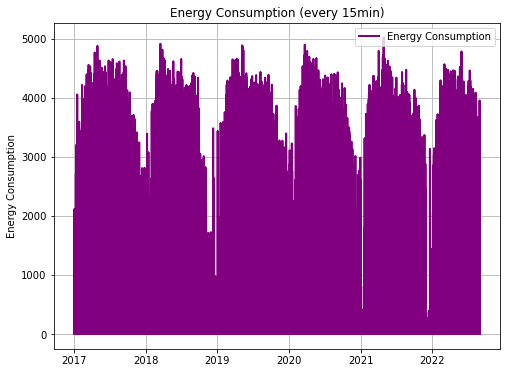

In [13]:
# Plot data for energy
plt.figure(figsize=(8, 6))  
plt.plot(df.index, df['energy'], label='Energy Consumption', color='purple', linestyle='-', linewidth=2)

# Customize the plot (add labels, title, grid, legend, etc.)
#plt.xlabel('X-Axis')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption (every 15min)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Create and train a linear regression model

In [16]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
model_LR = LinearRegression()
model_LR.fit(X_train_time, y_train_time)

# Make predictions
y_pred_LR = model_LR.predict(X_test_time)

# Evaluate the model
mae_LR = mean_absolute_error(y_test_time, y_pred_LR)
mse_LR = mean_squared_error(y_test_time, y_pred_LR)
r2_LR = r2_score(y_test_time, y_pred_LR)


print(f'Mean Absolute Error: {mae_LR:.2f}')
print(f'Mean Squared Error: {mse_LR:.2f}')
print(f'R-squared: {r2_LR:.2f}')

Mean Absolute Error: 243.72
Mean Squared Error: 183462.87
R-squared: 0.83


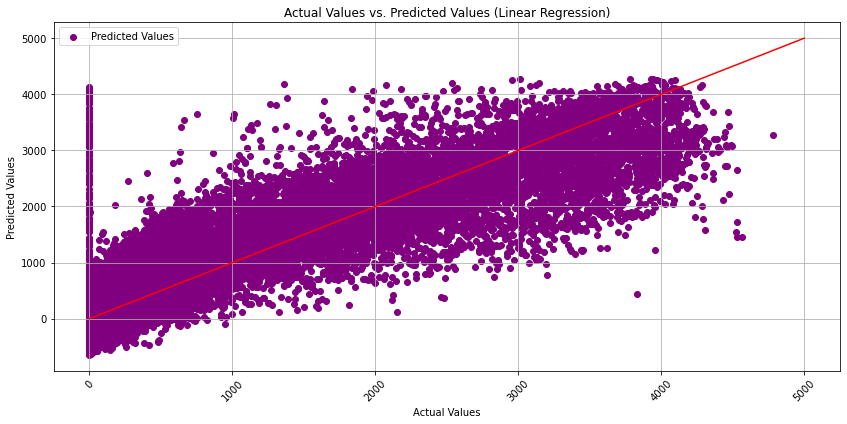

In [21]:
# Create a line chart 
plt.figure(figsize=(12, 6))
plt.scatter(y_test_time, y_pred_LR, color='purple', label='Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs. Predicted Values (Linear Regression)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
_ = plt.plot([x for x in range(0,5000)],[x for x in range(0,5000)], color='red')


plt.legend()

plt.show()


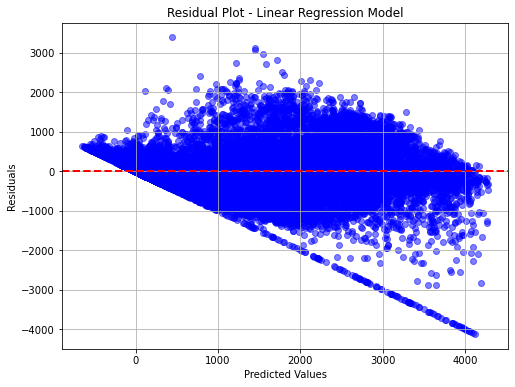

In [22]:
# Calculate residuals
residuals = y_test_time - y_pred_LR

# Create a residual plot manually
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_LR, residuals, color="b", alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residual Plot - Linear Regression Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

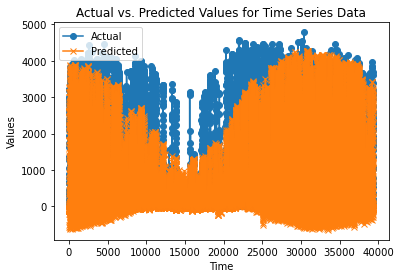

In [23]:
# Generate a time index for the data
time_index = np.arange(len(y_test_time))

# Create a line plot of actual vs. predicted values with time on the x-axis
plt.plot(time_index, y_test_time, label="Actual", marker='o')
plt.plot(time_index, y_pred_LR, label="Predicted", marker='x')

plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Actual vs. Predicted Values for Time Series Data")
plt.legend()
plt.show()

# Compare and Train a Ordinary Least Squares (OLS)

In [24]:
import statsmodels.api as sm
# Create the test and train sets. Here, we do things slightly differently.  
# We make the explanatory variable X as before.
X = df.drop(columns=["energy"]) 

# But here, reassign X the value of adding a constant to it. This is required for Ordinary Least Squares Regression.
X = sm.add_constant(X)
X.head()

,const,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,day sin,day cos,year sin,year cos
Date,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,1.0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,2.504006e-13,1.000000,0.010364,0.999946
2017-01-01 00:15:00,1.0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,6.540313e-02,0.997859,0.010544,0.999944
2017-01-01 00:30:00,1.0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,1.305262e-01,0.991445,0.010723,0.999943
2017-01-01 00:45:00,1.0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,1.950903e-01,0.980785,0.010902,0.999941
2017-01-01 01:00:00,1.0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,2.588190e-01,0.965926,0.011081,0.999939


In [25]:
# The rest of the preparation is as before.
y = df[["energy"]]


# Divide dataset for linear and ols models 
total_samples = len(X)
split_ratio = 0.8  # You can adjust this ratio as needed

# Calculate the split index
split_index = int(total_samples * split_ratio)

# Split the data into training and testing sets
X_train_time, X_test_time = X[:split_index], X[split_index:]
y_train_time, y_test_time = y[:split_index], y[split_index:]


In [26]:
# Create the model
rModel2 = sm.OLS(y_train_time, X_train_time)

# Fit the model with fit() 
rModel2_results = rModel2.fit()

In [27]:
# Evaluate the model with .summary()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 5.716e+04
Date:                Mon, 18 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:14:29   Log-Likelihood:            -1.1625e+06
No. Observations:              157420   AIC:                         2.325e+06
Df Residuals:                  157402   BIC:                         2.325e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2055.0750    142.868    -14.384      0.000   -2335.092   -1775.057
GHI                       19.5370      0.035    559.285      0.000      19.468      19.605
temp                      -3.2259      0.278    -11.619      0.000      -3.770      -2.682
pressure                   1.0074      0.116      8.662      0.000       0.779       1.235
humidity                  -3.5781      0.110    -32.584      0.000      -3.793      -3.363
wind_speed                -5.8647      0.629     -9.324      0.000      -7.097      -4.632
rain_1h                   26.4366      4.121      6.415      0.000      18.360      34.513
snow_1h                 -120.3970     14.122     -8.525      0.000    -148.076     -92.718
clouds_all                -0.6507      0.071     -9.179      0.000      -0.790      -0.512
isSun                   -103.0316      5.255    -19.608      0.000    -113.330     -92.733
sunlightTime              -1.2730      0.017    -74.455      0.000      -1.306      -1.239
dayLength                  1.9275      0.103     18.790      0.000       1.726       2.129
SunlightTime/daylength   862.3723     14.646     58.883      0.000     833.667     891.077
weather_type               8.9970      2.134      4.216      0.000       4.815      13.179
day sin                   27.4009      2.179     12.576      0.000      23.130      31.671
day cos                  -49.4983      3.156    -15.683      0.000     -55.684     -43.312
year sin                -106.5517      5.319    -20.031      0.000    -116.977     -96.126
year cos                 578.5802     28.059     20.620      0.000     523.586     633.575
==============================================================================
Omnibus:                    32619.332   Durbin-Watson:                   0.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           589880.400
Skew:                           0.516   Prob(JB):                         0.00
Kurtosis:                      12.427   Cond. No.                     1.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred_ols = rModel2_results.predict(X_test_time)

In [29]:
# Calculate MAE
mae_ols = mean_absolute_error(y_test_time, y_pred_ols)
print("Mean Absolute Error (MAE):", round(mae_ols,2))

# Calculate MSE
mse_ols = mean_squared_error(y_test_time, y_pred_ols)
print("Mean Squared Error (MSE):", round(mse_ols,2))

# Calculate R2
r2_ols = r2_score(y_test_time, y_pred_ols)
print("R-squared (R2):", round(r2_ols,2))

Mean Absolute Error (MAE): 243.72
Mean Squared Error (MSE): 183462.87
R-squared (R2): 0.83


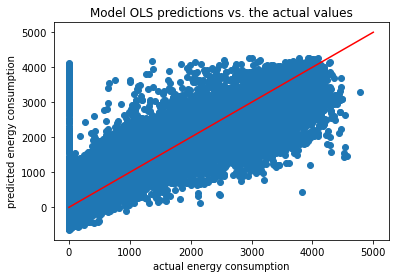

In [31]:
# Plot the predictions
# Build a scatterplot
_ = plt.scatter(y_test_time, y_pred_ols)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
_ = plt.plot([x for x in range(0,5000)],[x for x in range(0,5000)], color='red')

# Label 
_ = plt.title("Model OLS predictions vs. the actual values")
_ = plt.xlabel("actual energy consumption")
_ = plt.ylabel("predicted energy consumption")


# Compare and train a Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [37]:
# Create model with data split with out considering timeline
model_RF = RandomForestRegressor(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)

# Make predictions
y_pred_RF = model_RF.predict(X_test)

# Evaluate the model
mae_RF = mean_absolute_error(y_test, y_pred_RF)
mse_RF = mean_squared_error(y_test, y_pred_RF)
r2_RF = r2_score(y_test, y_pred_RF)

print(f'Mean Absolute Error: {mae_RF:.2f}')
print(f'Mean Squared Error: {mse_RF:.2f}')
print(f'R-squared (R2) Score: {r2_RF:.2f}')
print('-' * 40)

Mean Absolute Error: 104.77
Mean Squared Error: 68848.37
R-squared (R2) Score: 0.94
----------------------------------------


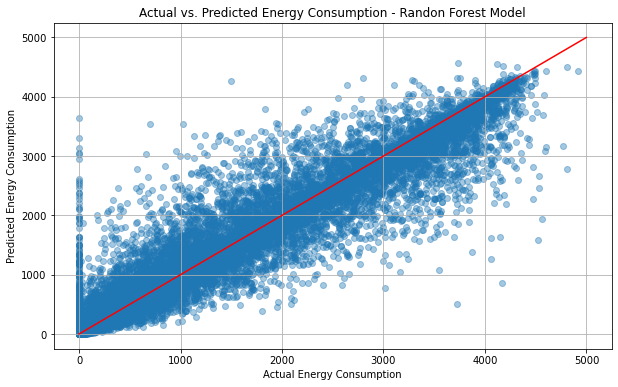

In [39]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_RF, alpha=0.4)  # Scatter plot
plt.title('Actual vs. Predicted Energy Consumption - Randon Forest Model')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.grid(True)

# Add a line for perfect correlation. 
_ = plt.plot([x for x in range(0,5000)],[x for x in range(0,5000)], color='red')


plt.show()

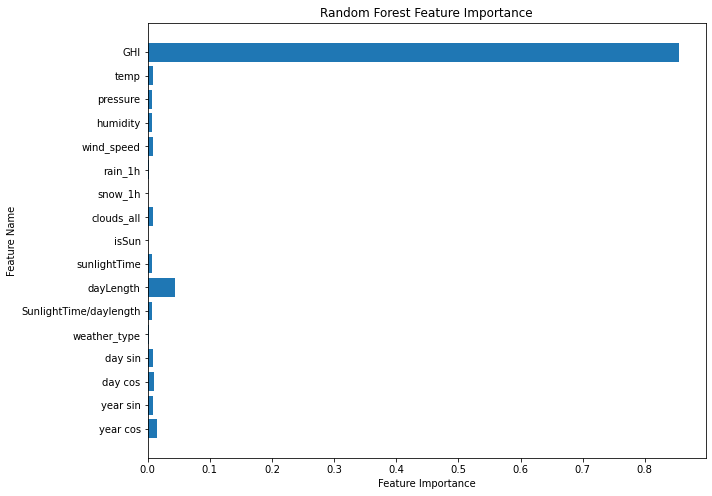

In [40]:
# Assuming you have a trained RandomForestRegressor called 'rf_model'
feature_importances = model_RF.feature_importances_
feature_names = X_train.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

# Compare and train a Gradient boosting

Test multiple learning rates in your gradient boosting classifier.

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

Using the feature importances from random forest model I'll drop some variables that arent very relevant for forecasting the energy consumption so that the Gradient boosting model can run quicker.

In [47]:
X_train_gb = X_train.drop(['pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'isSun', 'sunlightTime', 'SunlightTime/daylength', 'weather_type'], axis='columns')
X_test_gb = X_test.drop(['pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'isSun', 'sunlightTime', 'SunlightTime/daylength', 'weather_type'], axis='columns')
X_train_gb.columns
X_test_gb.columns

Index(['GHI', 'temp', 'clouds_all', 'dayLength', 'day sin', 'day cos',
       'year sin', 'year cos'],
      dtype='object')

In [ ]:
# This part of the code wasn't running either to search for the optimal learning rate.

learning_rates = [0.001, 0.01, 0.1, 0.5, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=10, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train_gb, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_gb, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test_gb, y_test)))
    print()

Apply the best learning rate to the model fit and predict on the testing set. Print out the confusion matrix and the classification report to review the model performance.

In [ ]:
model_gb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=3, random_state=42)
model_gb.fit(X_train_gb, y_train)
y_pred_gb = model_gb.predict(X_test_gb)

### I'm not able to run the Gradient Boosting Classifier on my machine with this data. It takes too long because the data is too large. I tried ruding the number of variables so that it was simplier but it still kept running for hours without a result.

In [ ]:
plt.rcParams['figure.figsize'] = (5,4)
import seaborn as sns

fig = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
            xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'], cmap="mako")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Gradient Boosting - Titanic Confusion Matrix')
plt.show()

In [ ]:
cr = classification_report(y_test, y_pred)
print(f'Classification report: \n {cr}')

### Calculate the ROC for the model as well.

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #random predictions curve
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Compare and train an ARIMA model

In [49]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [50]:
# Load the data with the reduced number of variables from gb data.

In [51]:
df_arima = df.drop(['pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'isSun', 'sunlightTime', 'SunlightTime/daylength', 'weather_type'], axis='columns')
df_arima.head()

,energy,GHI,temp,clouds_all,dayLength,day sin,day cos,year sin,year cos
Date,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,100,450,2.504006e-13,1.000000,0.010364,0.999946
2017-01-01 00:15:00,0,0.0,1.6,100,450,6.540313e-02,0.997859,0.010544,0.999944
2017-01-01 00:30:00,0,0.0,1.6,100,450,1.305262e-01,0.991445,0.010723,0.999943
2017-01-01 00:45:00,0,0.0,1.6,100,450,1.950903e-01,0.980785,0.010902,0.999941
2017-01-01 01:00:00,0,0.0,1.7,100,450,2.588190e-01,0.965926,0.011081,0.999939


In [52]:
df_arima.shape

(196776, 9)

In [53]:
df_daily = df_arima.resample('D').sum()
df_daily.head()

,energy,GHI,temp,clouds_all,dayLength,day sin,day cos,year sin,year cos
Date,,,,,,,,,
2017-01-01,2039,205.3,285.6,9536,43200,9.335796e-12,-3.022804e-12,1.812011,95.981714
2017-01-02,10307,403.3,81.6,5488,43200,-1.484568e-11,-9.843681e-12,3.462813,95.936342
2017-01-03,2256,234.7,136.4,9144,43200,-5.131631e-12,-9.425793e-14,5.112591,95.862580
2017-01-04,3948,287.9,112.0,6868,44640,2.029318e-11,-7.540302e-12,6.760856,95.760449
2017-01-05,0,0.0,0.0,0,0,0.000000e+00,0.000000e+00,0.000000,0.000000


In [54]:
df_daily.shape

(2069, 9)

<Figure size 432x288 with 0 Axes>

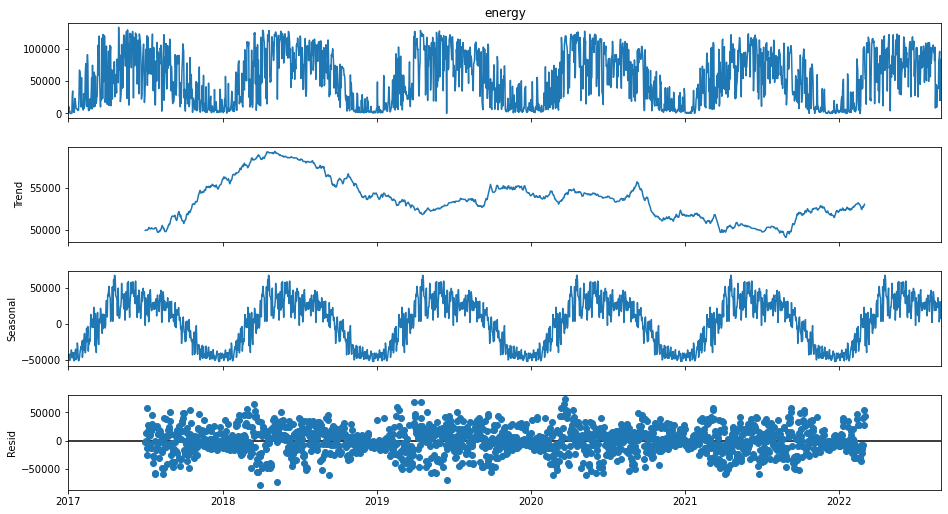

In [55]:
decomposition = seasonal_decompose(df_daily.energy, model='additive', period=365)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [56]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics (Chose 30 for it to be a 1M moving average)
    window_size = 30
    rolmean = timeseries.rolling(window=window_size).mean()
    rolstd = timeseries.rolling(window=window_size).std()
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

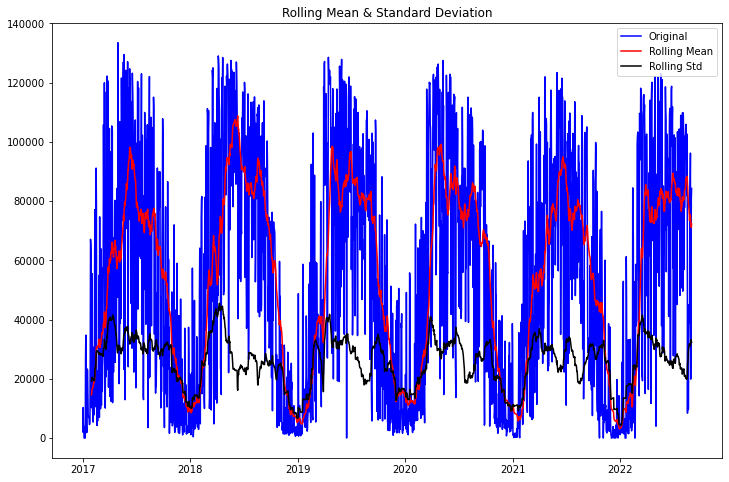

Results of Dickey-Fuller Test:
Test Statistic                   -3.246044
p-value                           0.017469
#Lags Used                       17.000000
Number of Observations Used    2051.000000
Critical Value (1%)              -3.433542
Critical Value (5%)              -2.862950
Critical Value (10%)             -2.567521
dtype: float64


In [57]:
test_stationarity(df_daily.energy)

### The test statistic is lower than the critical values at 10% and 5% but not 1% and the p-value is 0.02. We can reject the null hypothesis of non-stationary at a 5% critical value and the p-value is less than 0.05. This indicates that the data is likely stationary.

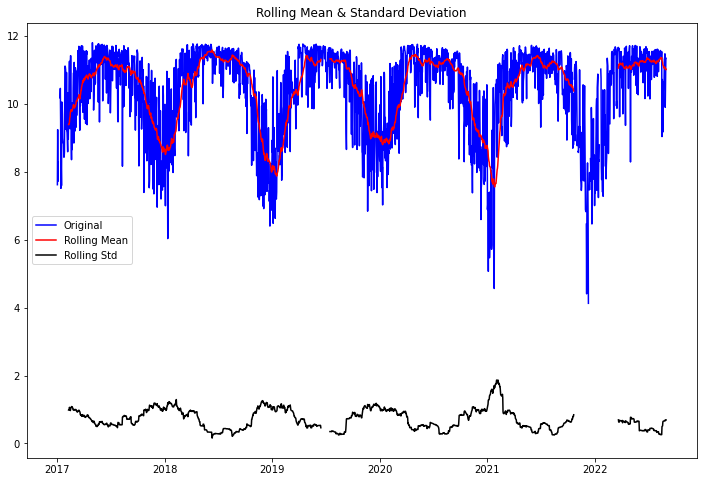

Results of Dickey-Fuller Test:


LinAlgError: SVD did not converge

In [58]:
df_daily.energy_log= df_daily.energy.apply(lambda x: np.log(x))  
test_stationarity(df_daily.energy_log)

# get error when running log: LinAlgError: SVD did not converge

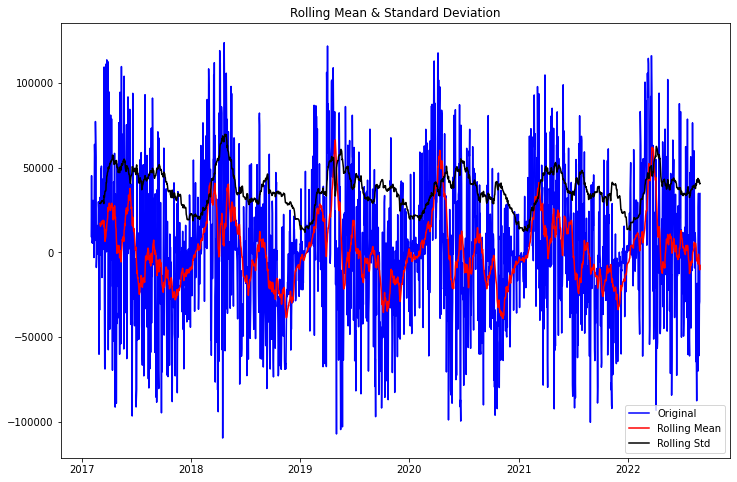

Results of Dickey-Fuller Test:
Test Statistic                -6.501234e+00
p-value                        1.160466e-08
#Lags Used                     1.700000e+01
Number of Observations Used    2.021000e+03
Critical Value (1%)           -3.433590e+00
Critical Value (5%)           -2.862971e+00
Critical Value (10%)          -2.567532e+00
dtype: float64


In [61]:
df_daily['first_difference'] = df_daily.energy - df_daily.energy.shift(30)  #30 for 1 month
test_stationarity(df_daily.first_difference.dropna(inplace=False))

### The test statistic is lower than the critical values at 10%, 5% and 1% and the p-value is nearly zero. We can reject the null hypothesis of non-stationary at a 1% critical value. This also indicates that the data is likely stationary.

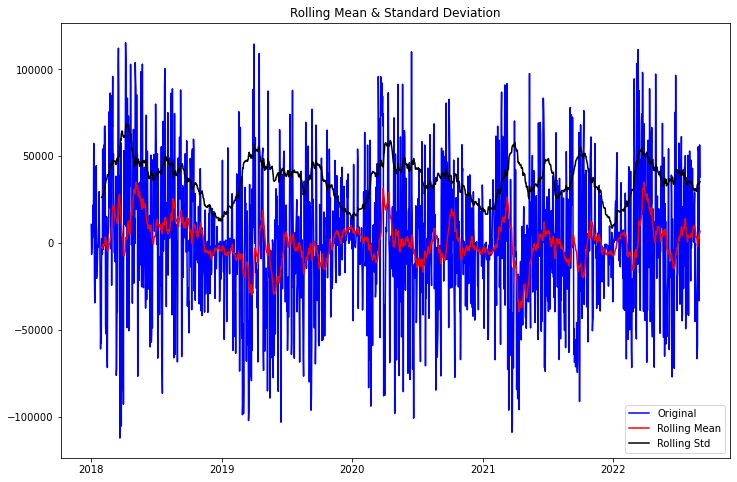

Results of Dickey-Fuller Test:
Test Statistic                  -28.946395
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1703.000000
Critical Value (1%)              -3.434196
Critical Value (5%)              -2.863239
Critical Value (10%)             -2.567674
dtype: float64


In [62]:
df_daily['seasonal_difference'] = df_daily.energy - df_daily.energy.shift(365) #365 for 12 months  
test_stationarity(df_daily.seasonal_difference.dropna(inplace=False))

### The test statistic is very negative and the p-value is zero. We can clearly reject the null hypothesis of non-stationary at a 1% critical value. This also indicates that the data is likely stationary.

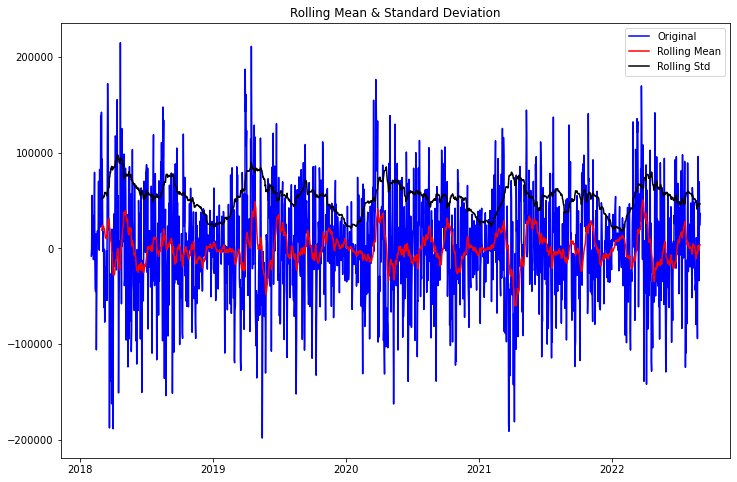

Results of Dickey-Fuller Test:
Test Statistic                -7.467989e+00
p-value                        5.143539e-11
#Lags Used                     2.500000e+01
Number of Observations Used    1.648000e+03
Critical Value (1%)           -3.434324e+00
Critical Value (5%)           -2.863295e+00
Critical Value (10%)          -2.567705e+00
dtype: float64


In [63]:
df_daily['seasonal_first_difference'] = df_daily.first_difference - df_daily.first_difference.shift(365)  
test_stationarity(df_daily.seasonal_first_difference.dropna(inplace=False))

### The test statistic is lower than the critical values at 10%, 5% and 1% and the p-value is nearly zero. We can reject the null hypothesis of non-stationary at a 1% critical value. This also indicates that the data is likely stationary.

As I performed further calculations on the data as shifts (1 month and 12 months) and first difference, the data becomes more cleary stationary as the test statistics becomes more negative and the p-value gets closer to zero.

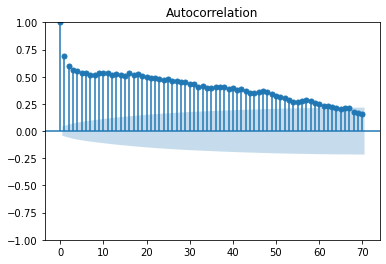

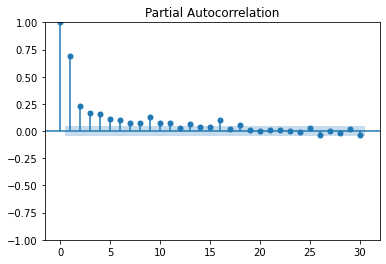

In [64]:
# Plot ACF and PACF plots for the  data
plot_acf(df_daily.energy, lags=70)
plot_pacf(df_daily.energy, lags=30)
plt.show()

## Compare and train an SARIMA model

In [ ]:
import itertools

p_values = range(11, 14)
d_values = range(1, 3)
q_values = range(62, 68)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [365]

best_aic = float("inf")
best_order = None
best_seasonal_order = None

for order in itertools.product(p_values, d_values, q_values):
    for seasonal_order in itertools.product(P_values, D_values, Q_values, s_values):
        try:
            mod = sm.tsa.statespace.SARIMAX(df_daily.energy, trend='c', order=order, seasonal_order=seasonal_order)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_seasonal_order = seasonal_order
        except:
            continue

print(f"Best AIC: {best_aic}")
print(f"Best Order: {best_order}")
print(f"Best Seasonal Order: {best_seasonal_order}")

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           75     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15834D+01    |proj g|=  4.72110D-02

At iterate    5    f=  1.15775D+01    |proj g|=  1.13472D-02

At iterate   10    f=  1.15774D+01    |proj g|=  6.98158D-04

At iterate   15    f=  1.15774D+01    |proj g|=  2.45487D-03

At iterate   20    f=  1.15773D+01    |proj g|=  4.13944D-03

At iterate   25    f=  1.15771D+01    |proj g|=  6.24987D-03

At iterate   30    f=  1.15770D+01    |proj g|=  1.99011D-03

At iterate   35    f=  1.15769D+01    |proj g|=  4.37001D-03

At iterate   40    f=  1.15765D+01    |proj g|=  1.07647D-02

At iterate   45    f=  1.15763D+01    |proj g|=  1.85903D-03


### When running the code above I get this note: "/Users/claudiazaffaroni/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals warnings.warn("Maximum Likelihood optimization failed to "" 
### "This problem is unconstrained"

## Compare and train an LSTM (Long Short-Term Memory) model

In [72]:
# Import necessary packages

import tensorflow as tf
from tensorflow.keras import models, layers

In [73]:
train_count = round(0.8 * len(df))
val_count = round(0.9 * len(df))

In [74]:
df.shape

(196776, 18)

In [75]:
df_train = df[:train_count]
df_val = df[train_count:val_count]
df_test = df[val_count:]

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler = MinMaxScaler()

In [78]:
# I'll try to predict the data based from the previous 20 data points using LSTM
window_size = 20

In [79]:
def df_to_data1(df, window_size=5):
    data = scaler.fit_transform(df.drop('energy', axis='columns').to_numpy())
    labels = df['energy'].to_numpy()
    
    X = []
    y = []
    
    for i in range(len(data) - window_size):
        row = data[i:i + window_size]
        X.append(row)
        y.append(labels[i + window_size])
        
    return np.array(X), np.array(y)

In [80]:
def df_to_data2(df, window_size=5):
    data = scaler.transform(df.drop('energy', axis='columns').to_numpy())
    labels = df['energy'].to_numpy()
    
    X = []
    y = []
    
    for i in range(len(data) - window_size):
        row = data[i:i + window_size]
        X.append(row)
        y.append(labels[i + window_size])
        
    return np.array(X), np.array(y)

In [81]:
X_train, y_train = df_to_data1(df_train, window_size=window_size)
X_val, y_val = df_to_data2(df_val, window_size=window_size)
X_test, y_test = df_to_data2(df_test, window_size=window_size)

In [82]:
X_train.shape

(157401, 20, 17)

In [83]:
y_train.shape

(157401,)

In [84]:
model = models.Sequential([
    layers.LSTM(64, input_shape=(window_size, X_train.shape[2])),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                20992     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 194,433
Trainable params: 194,433
Non-trai

In [85]:
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [86]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10


2023-09-18 17:34:36.867332: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4919/4919 [==============================] - 27s 5ms/step - loss: 145715.9062 - mse: 145715.9062 - mae: 170.1695 - val_loss: 80346.8672 - val_mse: 80346.8672 - val_mae: 120.9173
Epoch 2/10
4919/4919 [==============================] - 27s 6ms/step - loss: 100673.2812 - mse: 100673.2812 - mae: 137.1534 - val_loss: 80516.5938 - val_mse: 80516.5938 - val_mae: 118.2642
Epoch 3/10
4919/4919 [==============================] - 27s 5ms/step - loss: 97607.3203 - mse: 97607.3203 - mae: 133.3272 - val_loss: 79430.7344 - val_mse: 79430.7344 - val_mae: 112.3634
Epoch 4/10
4919/4919 [==============================] - 27s 6ms/step - loss: 95173.0547 - mse: 95173.0547 - mae: 130.8717 - val_loss: 78387.5625 - val_mse: 78387.5625 - val_mae: 113.3357
Epoch 5/10
4919/4919 [==============================] - 27s 6ms/step - loss: 93821.6094 - mse: 93821.6094 - mae: 129.3245 - val_loss: 77565.7656 - val_mse: 77565.7656 - val_mae: 113.4027
Epoch 6/10
4919/4919 [==============================] - 26s 5ms/step - l

### Analyzing model performance using test data

In [87]:
# import necessary packages

from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
def plotPredictions(X, y, start=0, end=200):
    predictions = model.predict(X)
    predictions = np.hstack(predictions)
    plt.plot(y[start:end], label='Actual')
    plt.plot(predictions[start:end], label='Predicted')
    plt.legend()
    print(f'MSE {mean_squared_error(y, predictions):.2f}')
    print(f'MAE {mean_absolute_error(y, predictions):.2f}')
    print(f'R2 {r2_score(y, predictions):.2f}') # added this line, try it
    spearman_stats = spearmanr(y, predictions)
    print(spearman_stats)

615/615 [==============================] - 1s 1ms/step
MSE 167313.45
MAE 172.22
R2 0.88
SignificanceResult(statistic=0.9351271861679533, pvalue=0.0)


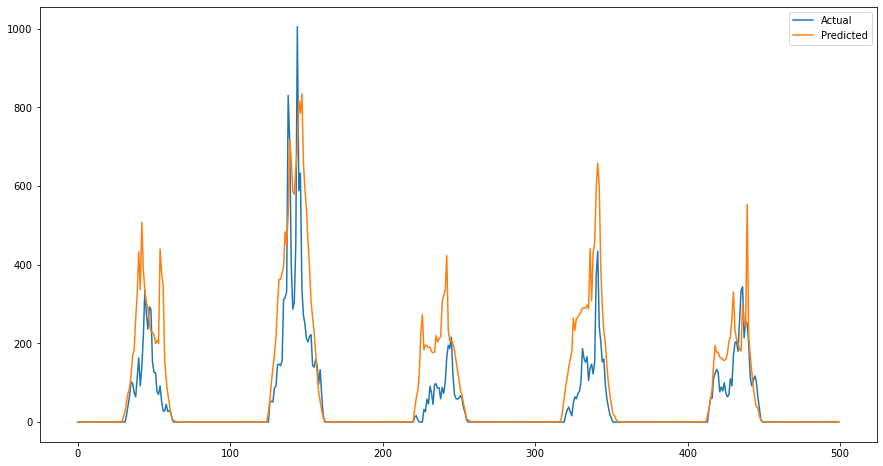

In [89]:
plt.figure(figsize=(15,8))
plotPredictions(X_test, y_test, start=0, end=500)

## Comparing all results from previous models trained:

# Linear Regression Model

In [241]:
print(f'Mean Absolute Error (MAE): {mae_LR:.2f}')
print(f'Mean Squared Error (MSE): {mse_LR:.2f}')
print(f'R-squared (R2): {r2_LR:.2f}')

Mean Absolute Error (MAE): 243.72
Mean Squared Error (MSE): 183462.87
R-squared (R2): 0.83


# OLS model

In [232]:
# Calculate MAE
mae_ols = mean_absolute_error(y_test_time, y_pred_ols)
print("Mean Absolute Error (MAE):", round(mae_ols,2))

# Calculate MSE
mse_ols = mean_squared_error(y_test_time, y_pred_ols)
print("Mean Squared Error (MSE):", round(mse_ols,2))

# Calculate R2
r2_ols = r2_score(y_test_time, y_pred_ols)
print("R-squared (R2):", round(r2_ols,2))

Mean Absolute Error (MAE): 243.34
Mean Squared Error (MSE): 184247.41
R-squared (R2): 0.83


# Random Forest model

In [42]:
print(f'Mean Absolute Error (MAE): {mae_RF:.2f}')
print(f'Mean Squared Error (MSE): {mse_RF:.2f}')
print(f'R-squared (R2) Score: {r2_RF:.2f}')

Mean Absolute Error (MAE): 104.77
Mean Squared Error (MSE): 68848.37
R-squared (R2) Score: 0.94


# Gradient boosting

I wasn't able to run GradientBoostingClassifier() on my computer. It was taking hours and I had to interrupt it.

# ARIMA & SARIMA model

The seasonal_decompose() function clearly shows the annual seasonality of the energy consumption data.

<Figure size 432x288 with 0 Axes>

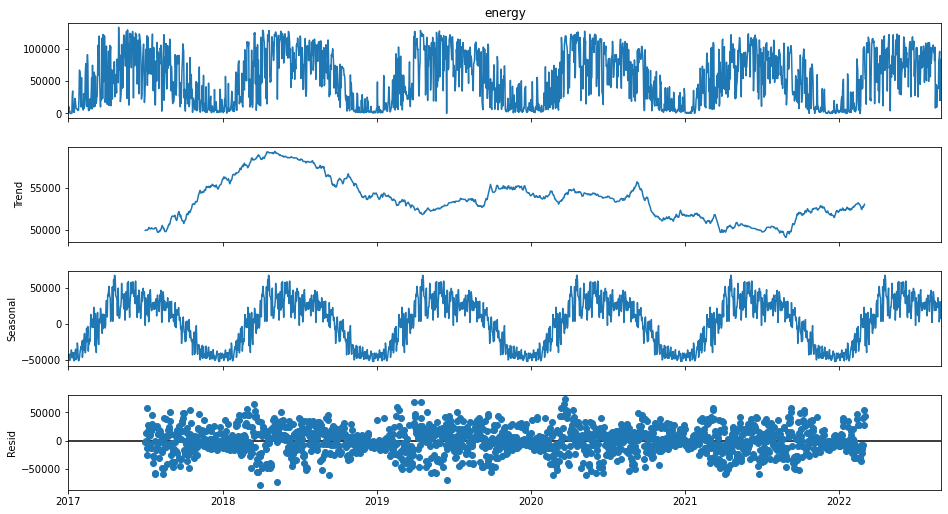

In [70]:
decomposition = seasonal_decompose(df_daily.energy, model='additive', period=365)  
fig = plt.figure()  
fig = decomposition.plot() 
fig.set_size_inches(15, 8)

I tried running the sm.tsa.statespace.SARIMAX() function but got a message: "Maximum Likelihood optimization failed to converge"

# LSTM (Long Short-Term Memory) model

615/615 [==============================] - 1s 2ms/step
MSE 167313.45
MAE 172.22
R2 0.88
SignificanceResult(statistic=0.9351271861679533, pvalue=0.0)


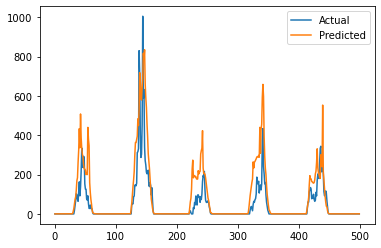

In [90]:
plotPredictions(X_test, y_test, start=0, end=500)

# Evaluating all models I was able to train 

The best model for using for predicting the energy consumption was the randon forest model taking into account the MSE, MAE and R2. ALthough this model gave the best preformance I think that givcen the seasoanlity of the data the best model would have been the SARIMA model that I wasn't able to run successfully. I will talk to my mentor about this to see if I can run this model. 